#### Setting up
This block loads libraries and dataset.

In [126]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
import shap

# Load Dataset
data = pd.read_csv('./dataset.csv')

In [127]:
data.head()

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0  3703080               7.889472e+11                    Very Slow   
1  3723955                        NaN                         Slow   
2  2446862               7.895520e+11                          NaN   
3  3092506               7.901568e+11                    Very Slow   
4  3514799               7.901568e+11                    Very Slow   

   Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                 22017.003799    13680.509944                  0.419483   
1                 65210.346095    40519.173105                       NaN   
2                 27326.560182    16979.661798                  0.050956   
3                 40225.948191    24994.839864                       NaN   
4                 35426.991794             NaN                  0.407832   

   Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0         163.178711              62753692.0         38993336.0   
1                NaN              57298148.0         35603420.0   
2          19.821890               7622911.5          4736657.5   
3                NaN                     NaN         26522368.0   
4         158.646713              61010824.0                NaN   

   Jupiter Tisserand Invariant  ...  Aphelion Dist  Perihelion Time  \
0                          NaN  ...       2.005764              NaN   
1                          NaN  ...       1.497352     2.457795e+06   
2                        4.557  ...       1.966857     2.458120e+06   
3                        5.093  ...       1.527904     2.457902e+06   
4                        5.154  ...            NaN     2.457814e+06   

   Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
0    264.837533     0.590551            NaN             1.0           1.0   
1    173.741112     0.845330         1995.0             1.0           1.0   
2           NaN          NaN         1995.0             NaN           8.0   
3     68.741007     0.700277         1995.0             NaN          15.0   
4           NaN          NaN            NaN             NaN          15.0   

   Orbital Period  Orbit Uncertainity  Hazardous  
0             Low              Medium       True  
1             Low                 NaN      False  
2          Medium                 NaN       True  
3             Low              Medium      False  
4             NaN                 Low       True  

[5 rows x 24 columns]


#### 1.1.1 Inspect Data Types
This block inspects the dataset and identifies the data types of all features (numerical, categorical).


In [128]:

# Inspect data types of each column
data.dtypes


Name                              int64
Epoch Date Close Approach       float64
Relative Velocity km per sec     object
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Semi Major Axis                 float64
Asc Node Longitude              float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
approach_year                   float64
approach_month                  float64
approach_day                    float64
Orbital Period                   object
Orbit Uncertainity               object
Hazardous                          bool
dtype: object


#### 1.1.2 Basic Statistics of Numerical Features
This block calculates basic statistics such as range, mean, median, standard deviation, and quartiles for each numerical feature.


In [129]:

# Calculate basic statistics for numerical features
data.describe()


Name  Epoch Date Close Approach  Relative Velocity km per hr  \
count  4.534000e+03               3.280000e+03                  3033.000000   
mean   3.268624e+06               1.178921e+12                 50516.969113   
std    5.517954e+05               1.986535e+11                 26530.144294   
min    2.000433e+06               7.889472e+11                  1207.814804   
25%    3.092344e+06               1.014365e+12                 30437.415189   
50%    3.513224e+06               1.202458e+12                 46968.245275   
75%    3.691155e+06               1.354954e+12                 65210.346095   
max    3.781897e+06               1.473318e+12                160681.487851   

       Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
count     3668.000000               3933.000000        3417.000000   
mean     31312.455735                  0.258221         100.709883   
std      16386.183907                  0.146070          56.938739   
min        750.489149                  0.000178           0.187669   
25%      18843.393552                  0.135807          52.877514   
50%      28959.416222                  0.265281         104.261452   
75%      40331.941346                  0.387033         150.434433   
max      99841.227826                  0.499884         194.359650   

       Miss Dist.(kilometers)  Miss Dist.(miles)  Jupiter Tisserand Invariant  \
count            3.166000e+03       3.882000e+03                  2802.000000   
mean             3.842441e+07       2.391178e+07                     5.126265   
std              2.207442e+07       1.357595e+07                     1.197144   
min              2.660989e+04       1.653462e+04                     2.367000   
25%              1.950318e+07       1.246634e+07                     4.179250   
50%              3.987901e+07       2.476464e+07                     5.102500   
75%              5.769962e+07       3.581782e+07                     6.043000   
max              7.478160e+07       4.646713e+07                     9.025000   

       Epoch Osculation  Semi Major Axis  Asc Node Longitude  Perihelion Arg  \
count      3.007000e+03      3346.000000         3438.000000     3400.000000   
mean       2.457720e+06         1.358242          172.185790      185.148924   
std        9.248399e+02         0.465313          103.055919      103.417240   
min        2.450936e+06         0.615920            0.001941        0.006918   
25%        2.458000e+06         0.990008           83.288427       96.100513   
50%        2.458000e+06         1.223551          173.895246      192.420121   
75%        2.458000e+06         1.626350          253.635285      273.067950   
max        2.458000e+06         2.568553          359.905890      359.993098   

       Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  \
count    3719.000000     2.970000e+03   3616.000000  3026.000000   
mean        1.898115     2.457741e+06    182.735237     0.761090   
std         0.834499     9.155433e+02    107.757042     0.337745   
min         0.803765     2.450100e+06      0.003191     0.239363   
25%         1.260397     2.457826e+06     87.066671     0.483841   
50%         1.590005     2.457976e+06    189.051112     0.737684   
75%         2.331365     2.458109e+06    278.038676     1.002870   
max         4.662158     2.458706e+06    359.917991     1.946801   

       approach_year  approach_month  approach_day  
count    3715.000000     3006.000000   3991.000000  
mean     2006.920592        6.474385     14.896517  
std         6.292621        3.462926      5.717762  
min      1995.000000        1.000000      1.000000  
25%      2002.000000        3.000000      8.000000  
50%      2008.000000        7.000000     15.000000  
75%      2013.000000       10.000000     22.000000  
max      2016.000000       12.000000     22.000000


#### 1.1.3 Identify Missing Values
This block identifies the features that have missing values.


In [130]:

# Check for missing values in each column
data.isnull().sum()

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64


#### 1.1.4 Numerical and Categorical Features
This block identifies the numerical and categorical features of the dataset for further analysis.


In [131]:

# List of numerical and categorical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

numerical_features, categorical_features


(['Name',
  'Epoch Date Close Approach',
  'Relative Velocity km per hr',
  'Miles per hour',
  'Miss Dist.(Astronomical)',
  'Miss Dist.(lunar)',
  'Miss Dist.(kilometers)',
  'Miss Dist.(miles)',
  'Jupiter Tisserand Invariant',
  'Epoch Osculation',
  'Semi Major Axis',
  'Asc Node Longitude',
  'Perihelion Arg',
  'Aphelion Dist',
  'Perihelion Time',
  'Mean Anomaly',
  'Mean Motion',
  'approach_year',
  'approach_month',
  'approach_day'],
 ['Relative Velocity km per sec', 'Orbital Period', 'Orbit Uncertainity'])


#### 1.1.5 Imputation of Missing Values
This block handles imputation for both numerical and categorical columns, filling missing values appropriately.


In [132]:

# Imputation: Fill missing numerical values with the median, and categorical values with the mode
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])
data.isnull().sum()  # Check if all missing values are filled


Name                            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Semi Major Axis                 0
Asc Node Longitude              0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
approach_year                   0
approach_month                  0
approach_day                    0
Orbital Period                  0
Orbit Uncertainity              0
Hazardous                       0
dtype: int64


#### 1.2.1 Plot Distribution of Numerical Features
This block plots the distribution of numerical features to check for skewness and assess the need for normalization.


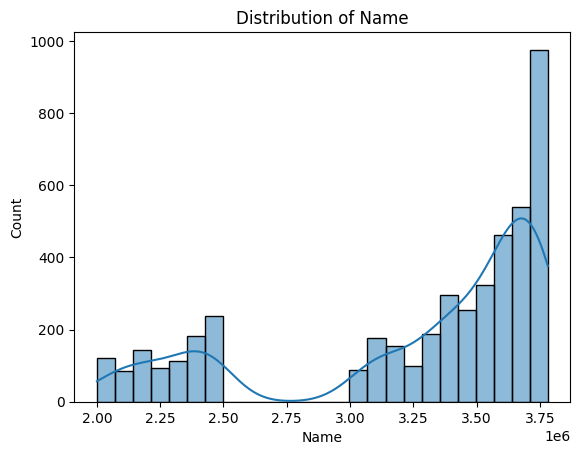

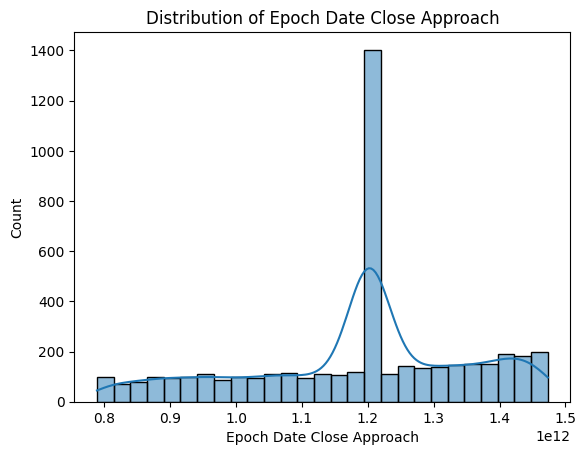

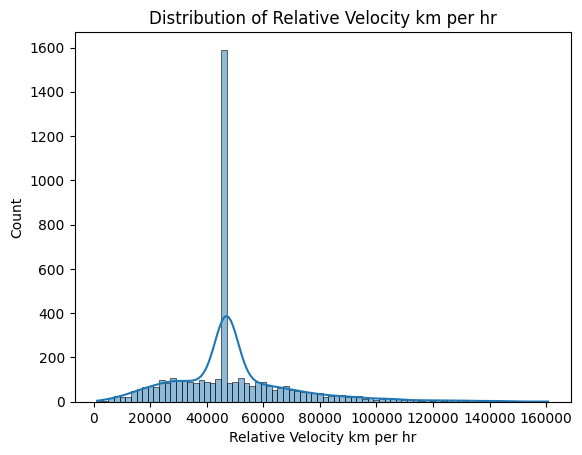

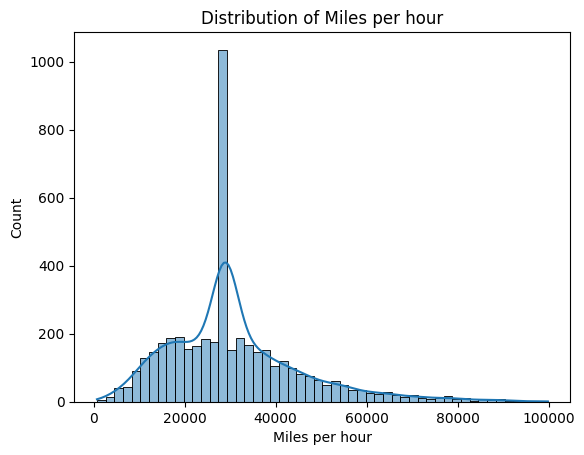

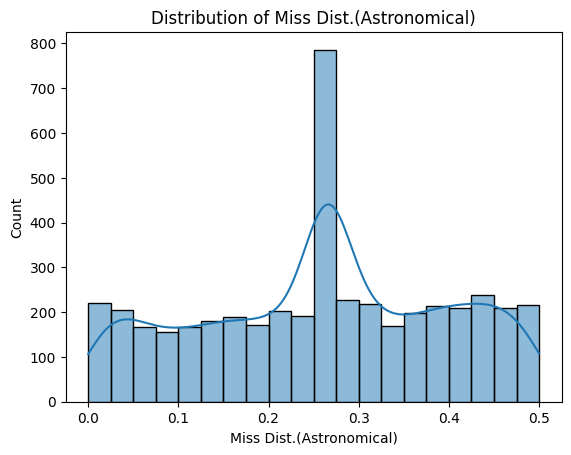

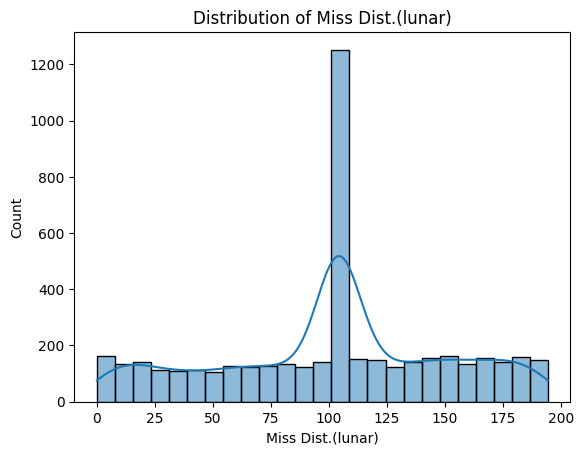

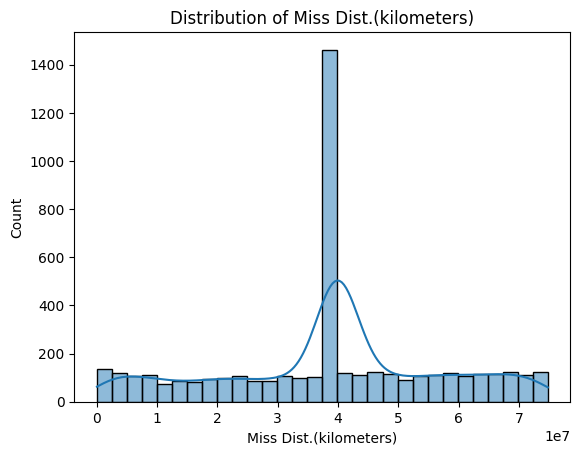

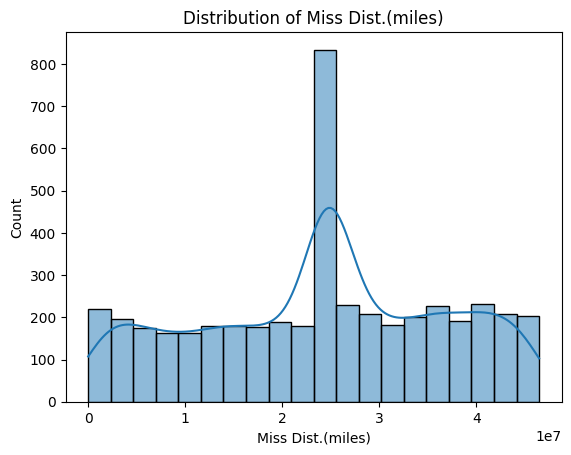

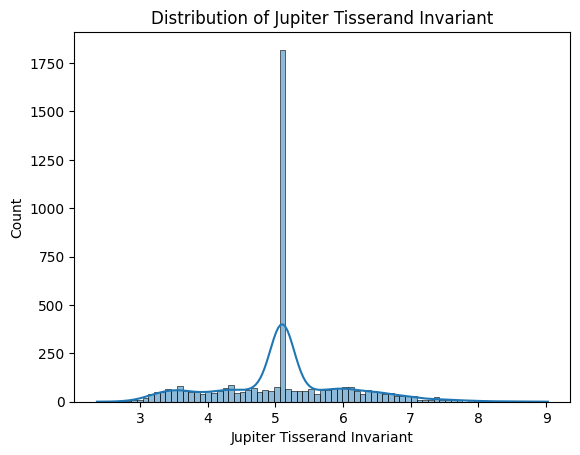

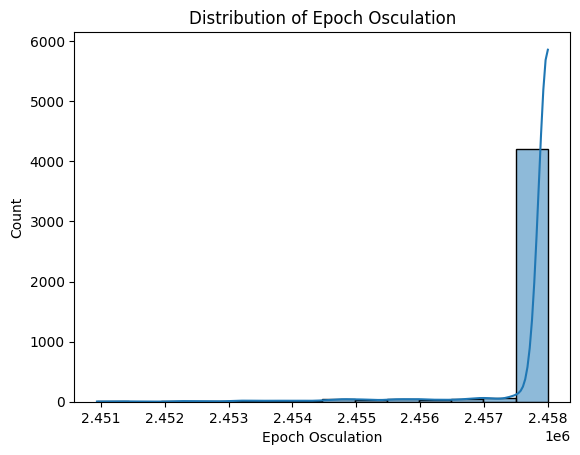

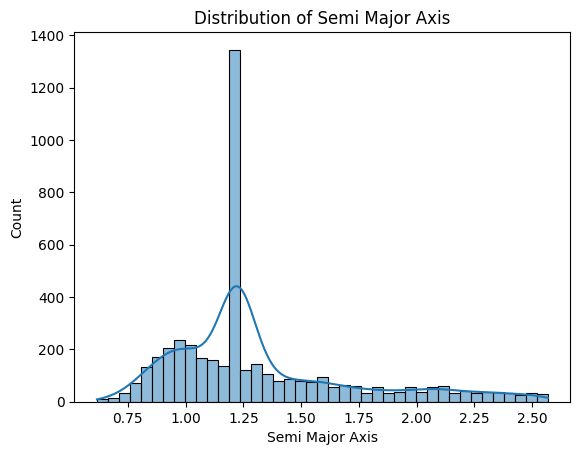

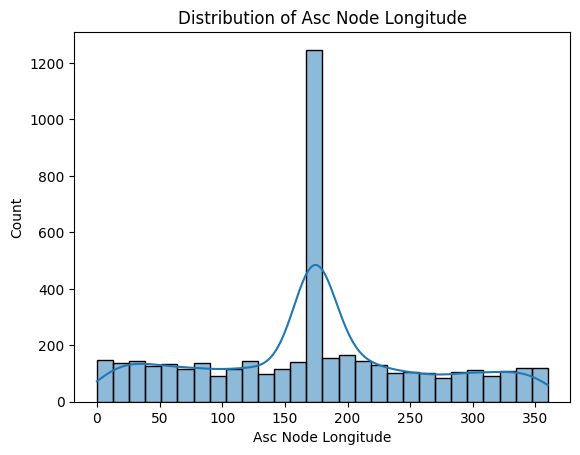

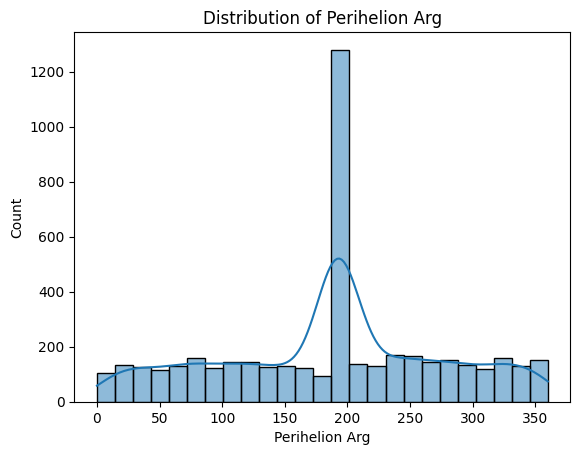

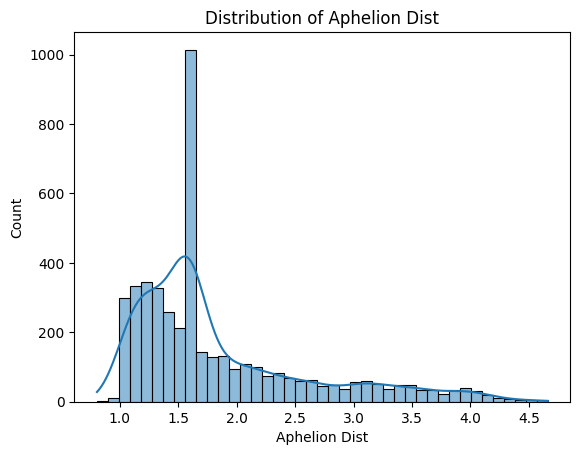

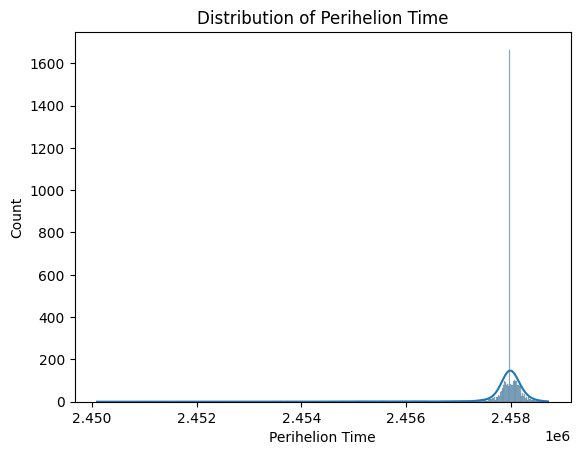

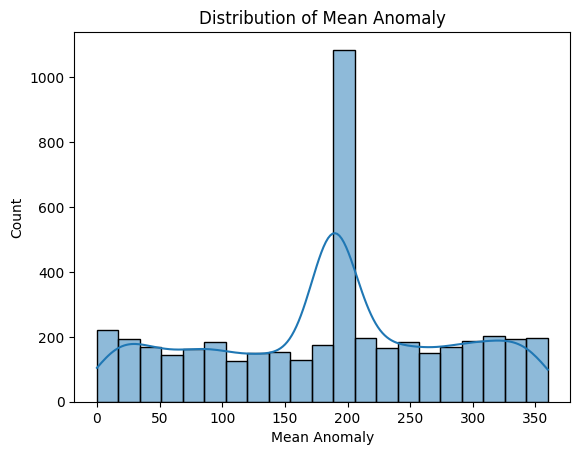

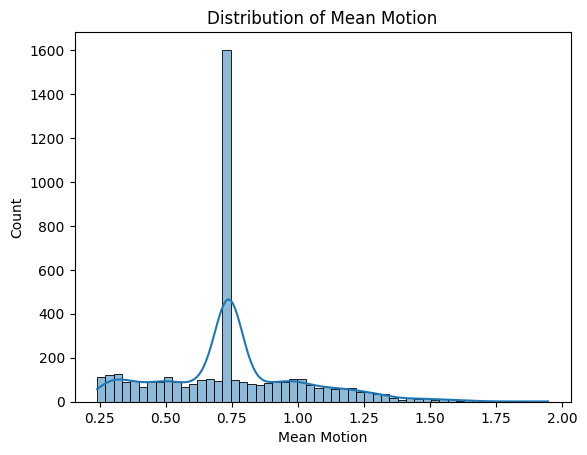

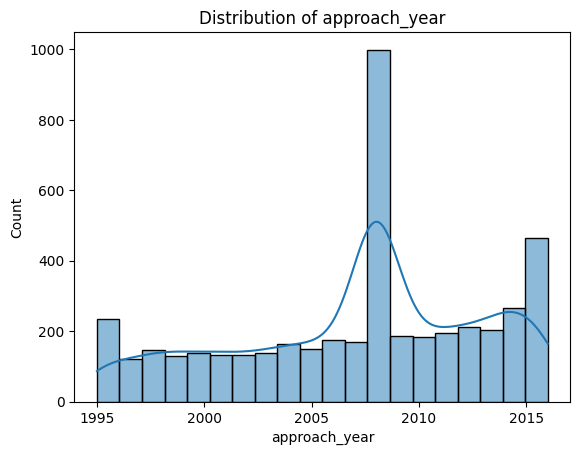

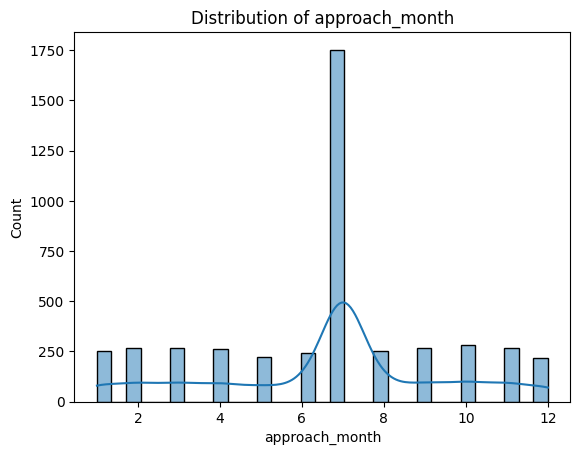

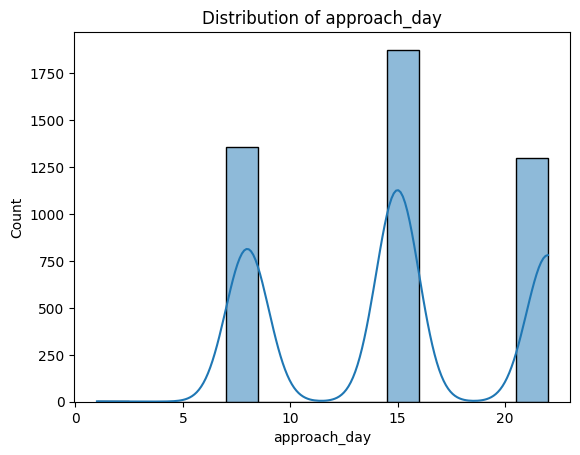

In [133]:

# Plot histograms of numerical features to assess skewness
for col in numerical_features:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

In [134]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# List of all numerical features to scale
numerical_features = [
    'Epoch Osculation', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 
    'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Epoch Date Close Approach', 
    'Miles per hour', 'Relative Velocity km per hr', 'Mean Anomaly', 
    'Mean Motion', 'Perihelion Time', 'Aphelion Dist', 'Semi Major Axis'
]

# Apply Min-Max Scaling to all numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the normalized dataset
data.head()

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0  3703080                   0.000000                    Very Slow   
1  3723955                   0.604220                         Slow   
2  2446862                   0.000884                         Slow   
3  3092506                   0.001767                    Very Slow   
4  3514799                   0.001767                    Very Slow   

   Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                     0.130487        0.130487                  0.839102   
1                     0.401336        0.401336                  0.530517   
2                     0.163781        0.163781                  0.101616   
3                     0.244668        0.244668                  0.530517   
4                     0.214576        0.284678                  0.815788   

   Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0           0.839416                0.839102           0.839102   
1           0.535988                0.766123           0.766123   
2           0.101118                0.101616           0.101616   
3           0.535988                0.533107           0.570624   
4           0.816076                0.815788           0.532783   

   Jupiter Tisserand Invariant  ...  Aphelion Dist  Perihelion Time  \
0                       5.1025  ...       0.311528         0.915249   
1                       5.1025  ...       0.179761         0.894163   
2                       4.5570  ...       0.301445         0.931988   
3                       5.0930  ...       0.187679         0.906640   
4                       5.1540  ...       0.203774         0.896428   

   Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
0      0.735825     0.205681         2008.0             1.0           1.0   
1      0.482720     0.354898         1995.0             1.0           1.0   
2      0.525257     0.291853         1995.0             7.0           8.0   
3      0.190984     0.269945         1995.0             7.0          15.0   
4      0.525257     0.291853         2008.0             7.0          15.0   

   Orbital Period  Orbit Uncertainity  Hazardous  
0             Low              Medium       True  
1             Low                 Low      False  
2          Medium                 Low       True  
3             Low              Medium      False  
4             Low                 Low       True  

[5 rows x 24 columns]


#### 1.2.2 Identify Potential Outliers
This block uses box plots to identify potential outliers in the numerical columns.


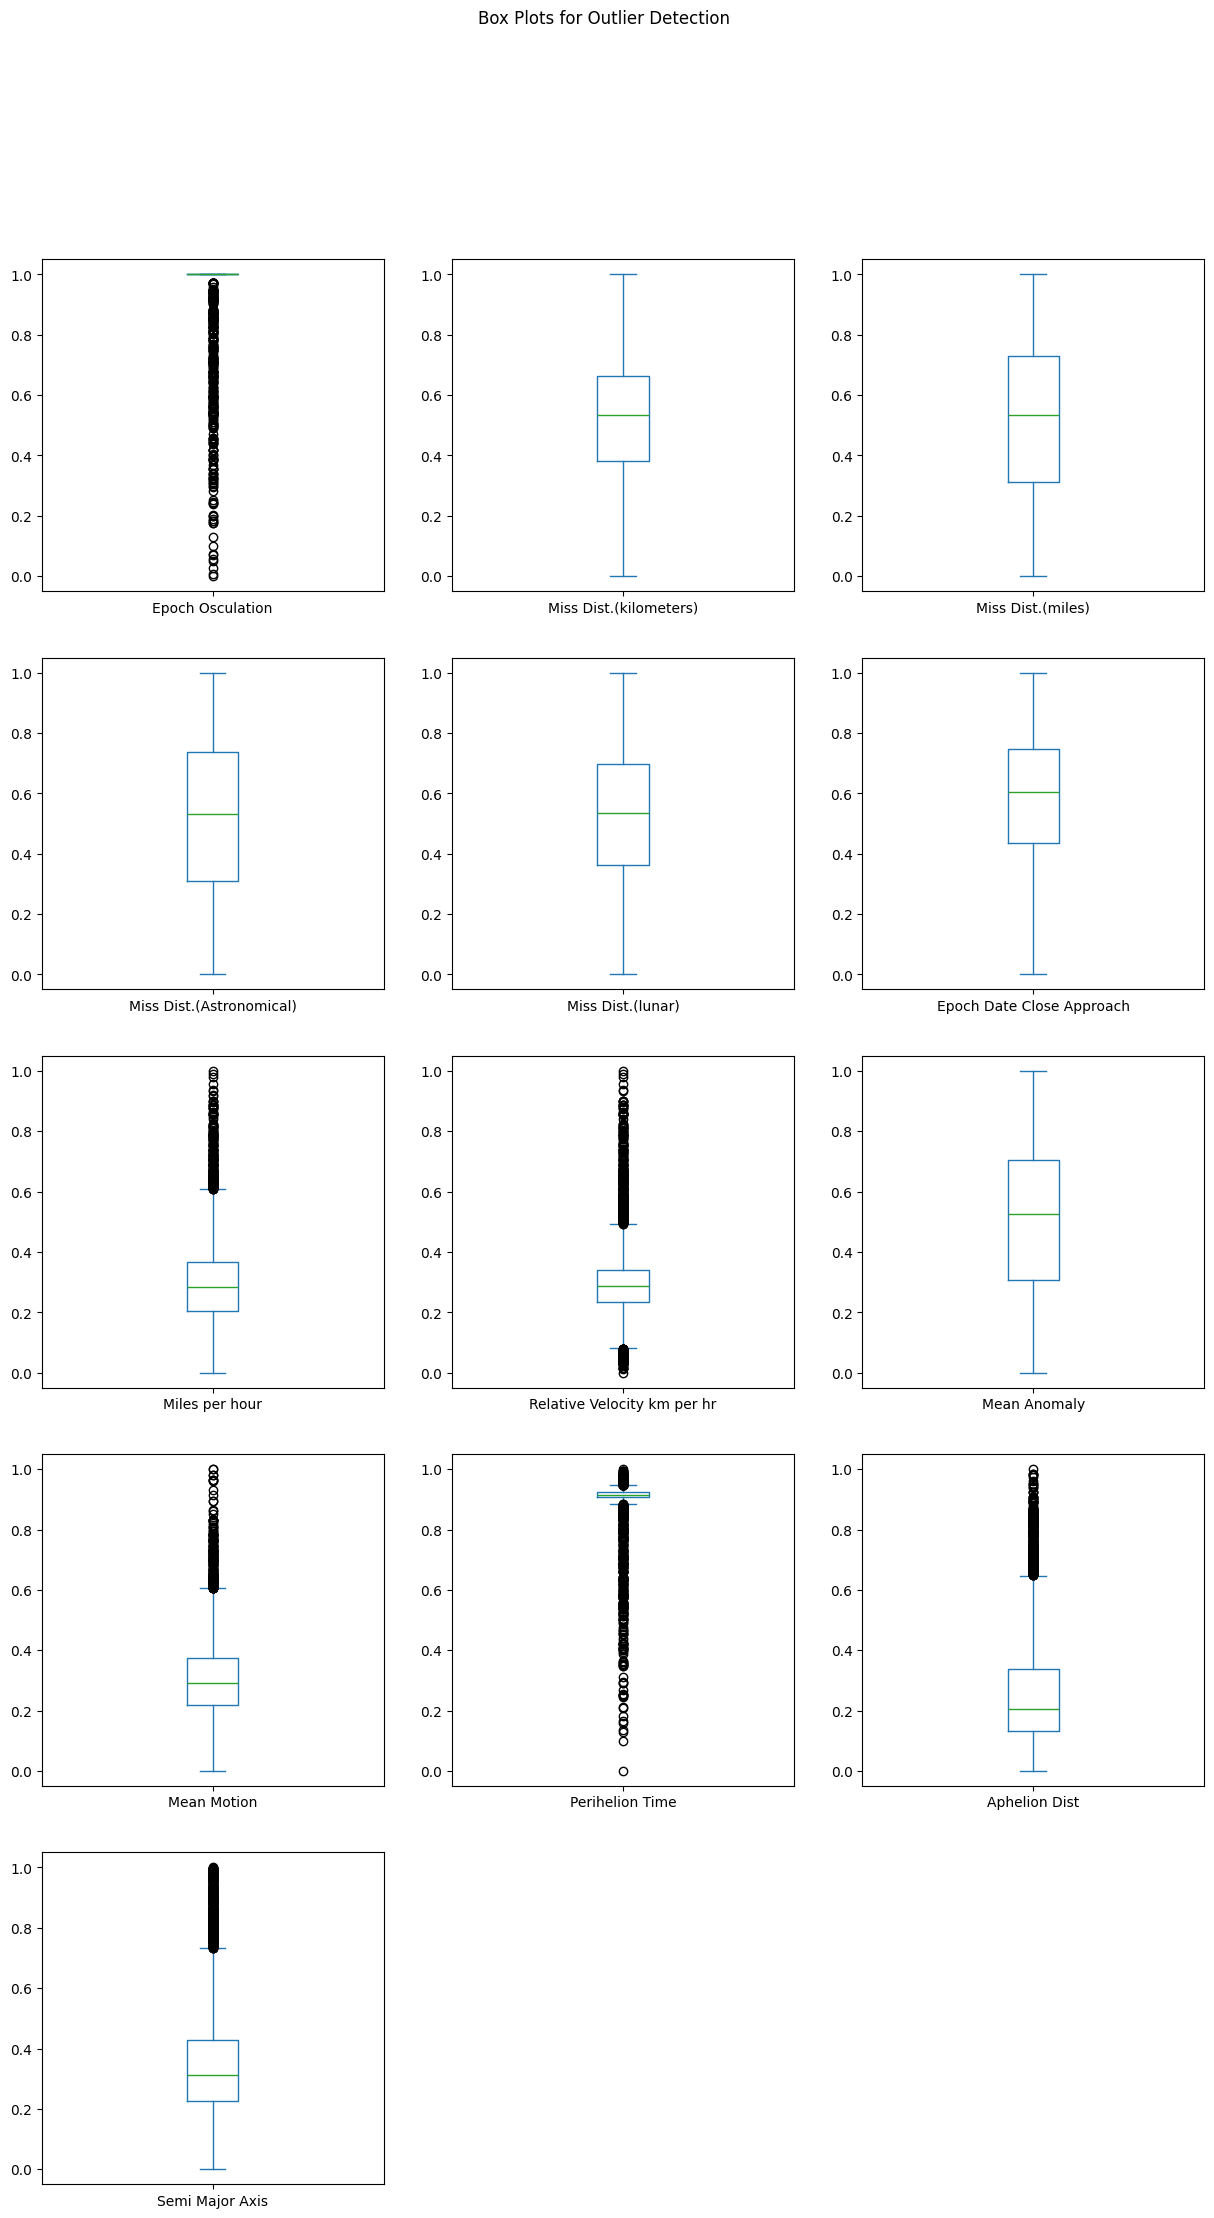

In [135]:
# Adjust the layout dynamically based on the number of features
numerical_features_df=data[numerical_features]
num_features_count = len(numerical_features_df.columns)
rows = (num_features_count // 3) + 1  # Number of rows needed

# Create box plots
ax = numerical_features_df.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(15, 5 * rows))

plt.suptitle("Box Plots for Outlier Detection")
plt.savefig("box_plots_outlier_detection.png", dpi=300, bbox_inches='tight')
plt.show()

In [136]:
def remove_outliers_iqr(df, columns, multiplier=1.5):
    # For each column, remove outliers using the IQR method with the provided multiplier
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Remove rows outside the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns where we identified potential outliers
numerical_columns_with_outliers = [
    'Relative Velocity km per hr', 'Miles per hour', 'Jupiter Tisserand Invariant',
    'Epoch Osculation', 'Semi Major Axis', 'Aphelion Dist', 'Perihelion Time',
    'Mean Motion'
]

# Using a multiplier of 2.5 for a less strict outlier removal
data_cleaned = remove_outliers_iqr(data, numerical_columns_with_outliers, multiplier=2.5)

# Check the size of the cleaned data
print("Size of data after applying a 2.5x IQR threshold:", data_cleaned.shape)


Size of data after applying a 2.5x IQR threshold: (3427, 24)



#### 1.2.3 Explore Relationships Between Features
This block explores relationships between different features using scatter plots and correlation matrices.


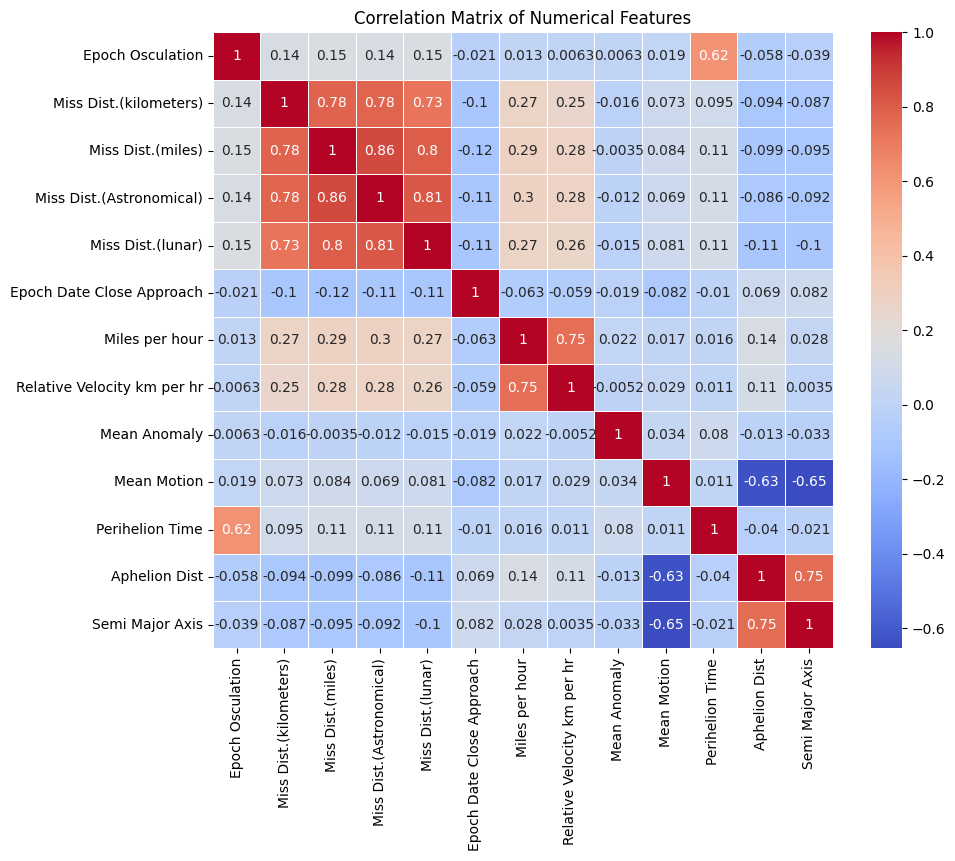

In [137]:

# Correlation matrix to explore relationships
corr_matrix = numerical_features_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



#### 1.3.1 Create a Pairplot
This block uses Seaborn to create a pairplot to visualize relationships between multiple numerical features.


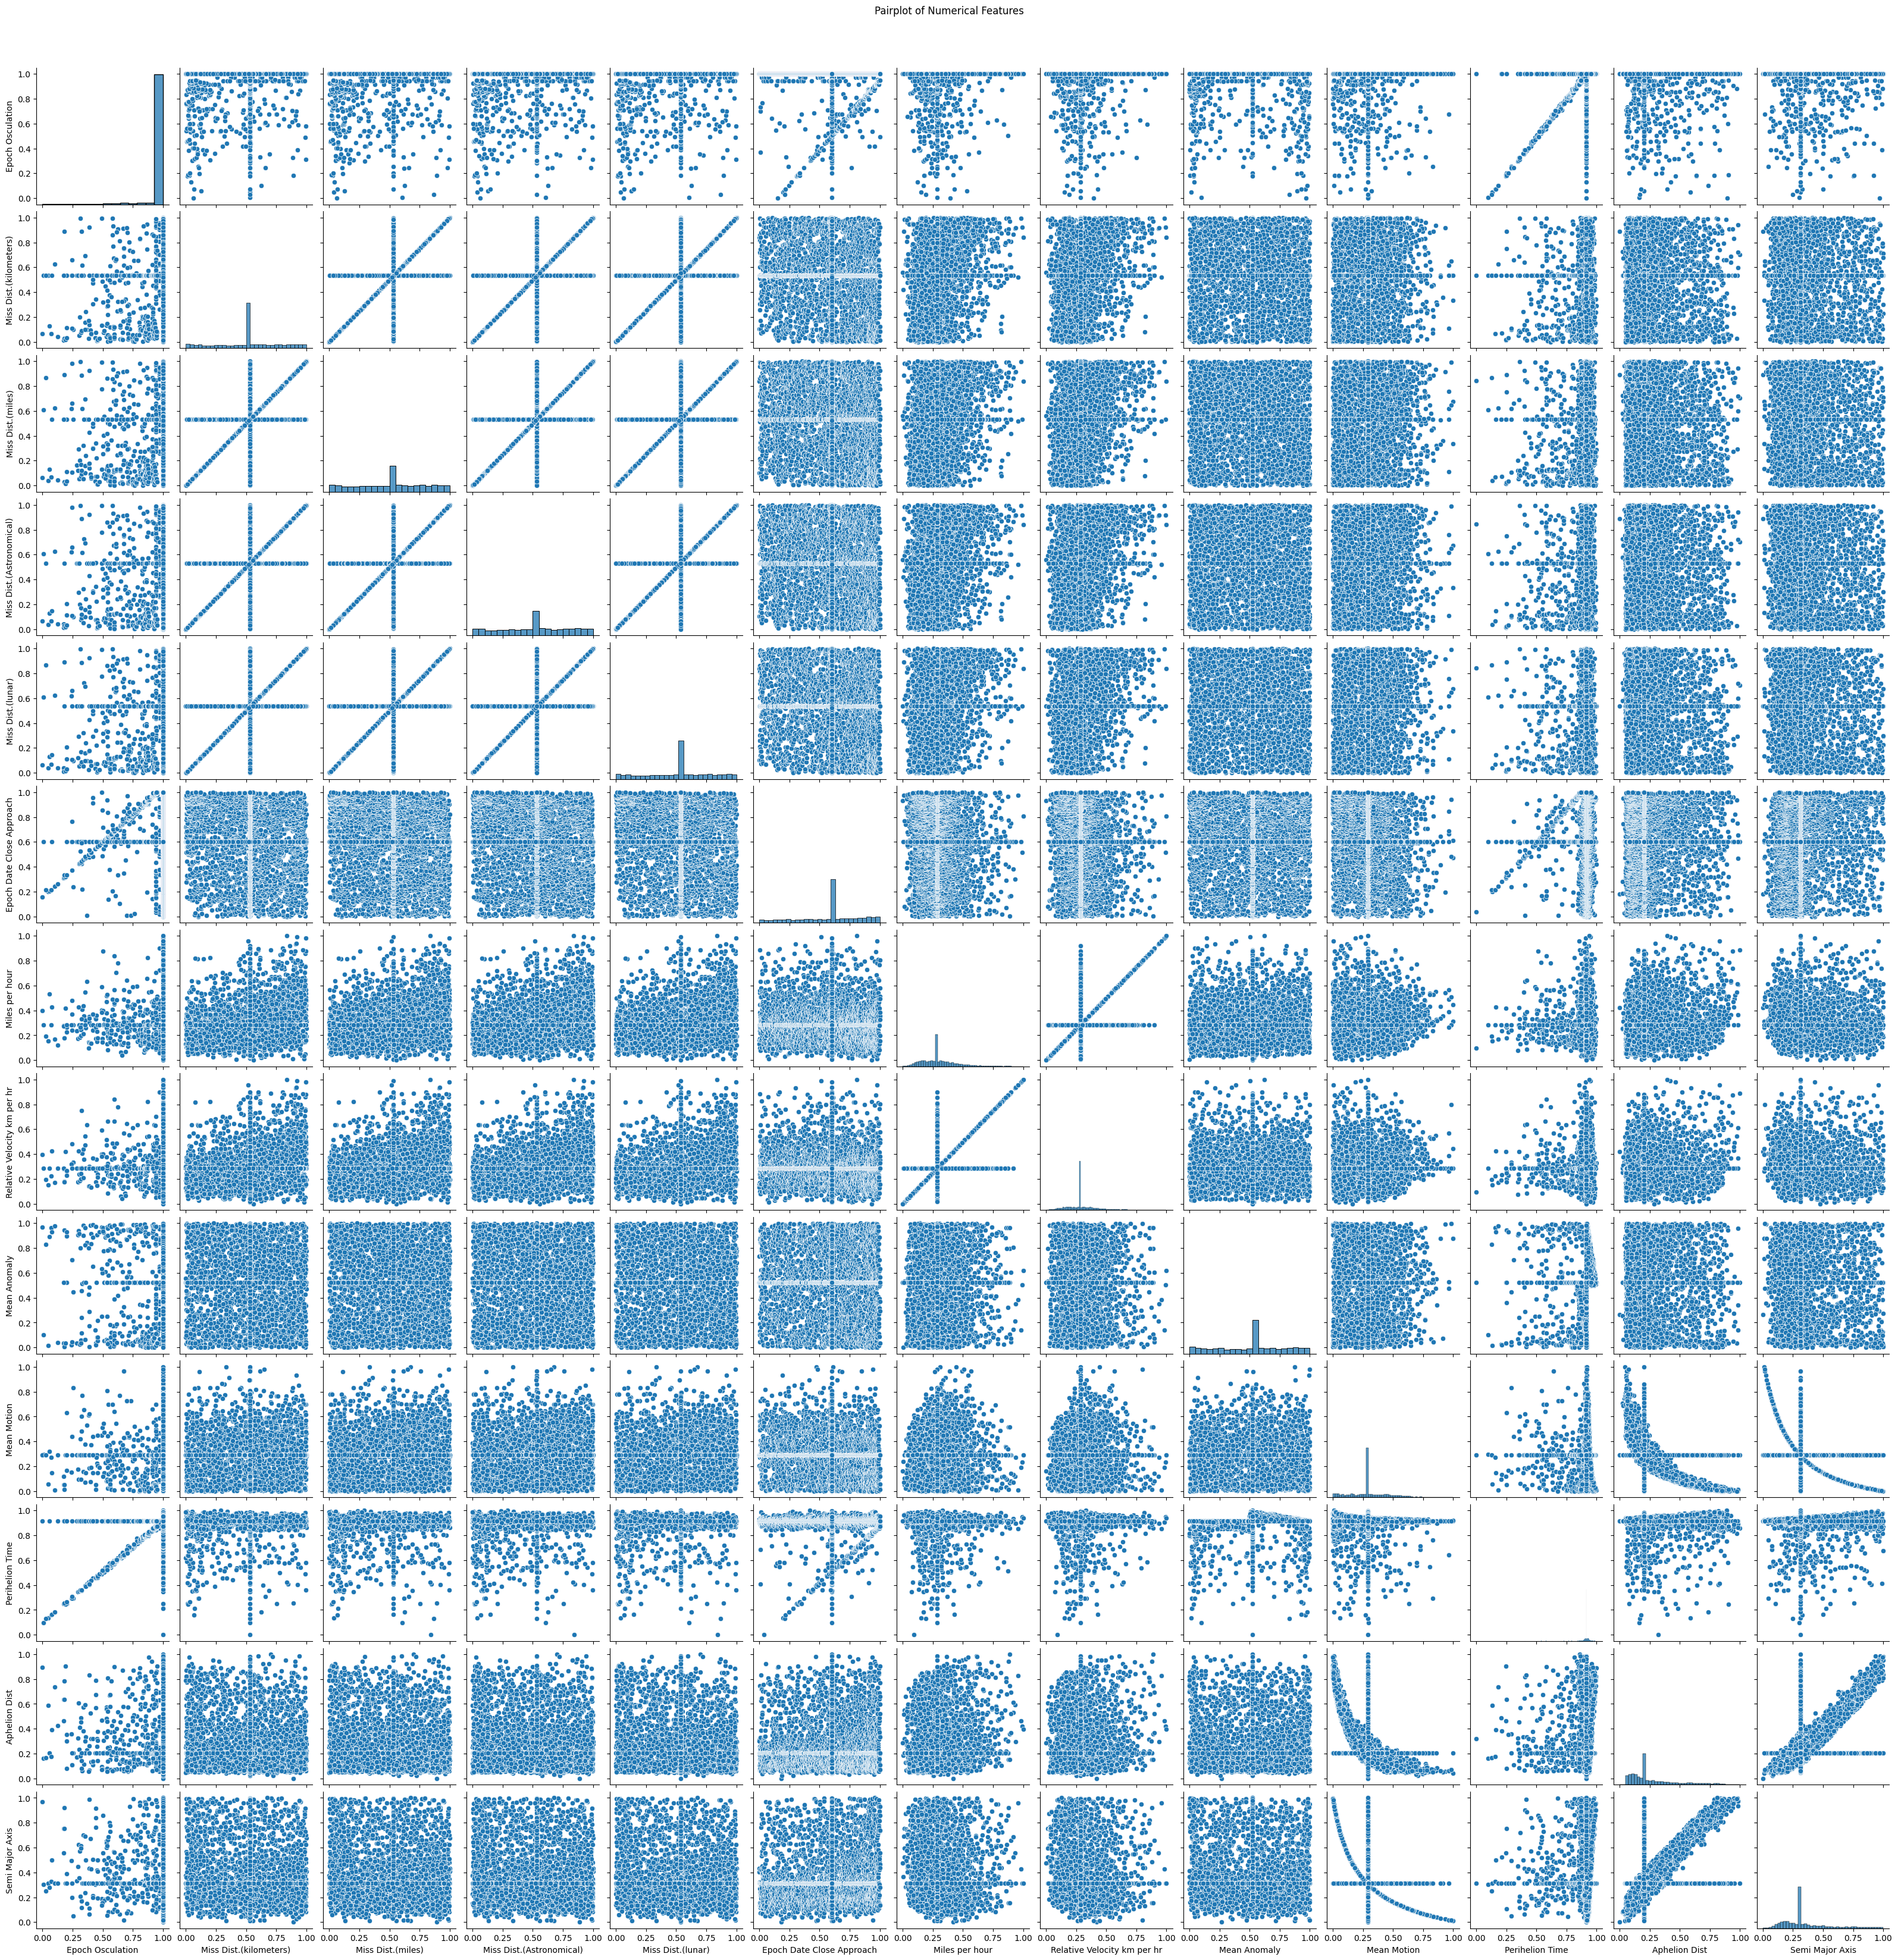

In [138]:

# Create a pairplot for the numerical features
sns.pairplot(numerical_features_df)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.savefig("pairplot_of_numerical_features.png", dpi=300, bbox_inches='tight')
plt.show()



#### 1.3.2 Inferences from Pairplot

The pairplot provides insights into the distribution and relationships of numerical features in the dataset.

- **Diagonal Plots**:
  The diagonal plots display the **distribution** of each individual feature, shown as histograms. These give us an idea of the spread and skewness of the data. Features that exhibit significant skewness may require transformation for better performance in machine learning models. In addition, the presence of any **outliers** can be identified from these plots, as they appear as isolated points at the extremes.

- **Off-Diagonal Plots**:
  The off-diagonal scatterplots illustrate the **pairwise relationships** between variables. These plots help us visualize:
  - **Correlation**: Positive or negative trends between variables, which may suggest a correlation.
  - **Non-linear relationships**: Curved patterns in some scatterplots indicate potential non-linear relationships between variables.
  - **Outliers**: Points that lie far from the main data clusters, potentially indicating unusual or extreme values.

Overall, from the pairplot, we can observe how variables interact with each other, detect correlations or independence, and identify potential data quality issues like skewness or outliers. These insights will guide us in choosing appropriate preprocessing techniques and modeling strategies.



#### 1.4.1 Identifying and Addressing Class Imbalance
This block checks if there is class imbalance in the dataset and discusses strategies to handle it.


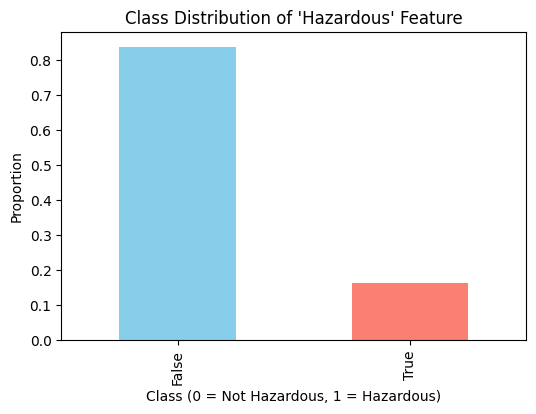

Hazardous
False    0.837671
True     0.162329
Name: proportion, dtype: float64

In [139]:

# Checking for class imbalance in the 'Hazardous' column
class_distribution = data['Hazardous'].value_counts(normalize=True)

# Plotting the class distribution
plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution of 'Hazardous' Feature")
plt.xlabel('Class (0 = Not Hazardous, 1 = Hazardous)')
plt.ylabel('Proportion')
plt.savefig("class_distribution_of_hazardous.png", dpi=300, bbox_inches='tight')
plt.show()

class_distribution



To handle class imbalance, we can try the following techniques:

#### Resampling Methods:
- **Oversampling the Minority Class**: Use methods like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class to balance the dataset.
- **Undersampling the Majority Class**: Randomly remove examples from the majority class to reduce the imbalance, but we should be cautious as this may lead to loss of valuable data.

#### Using Class Weights:
- Many machine learning models (such as Random Forest, SVM, or Logistic Regression) allow for the adjustment of class weights. We can assign higher weights to the minority class, making the model pay more attention to the "Hazardous" class.

#### Anomaly Detection Techniques:
- Since the "Hazardous" class is rare, framing the problem as an anomaly detection task might also be effective in identifying rare events.

#### Evaluation Metrics:
- Use appropriate metrics for imbalanced data, such as Precision, Recall, F1-Score, or the Area Under the Precision-Recall Curve (AUC-PR), instead of accuracy. These metrics give a better indication of model performance in the presence of class imbalance.

### 1.4.2 Implications of Class Imbalance on Model Performance

Class imbalance can lead to poor model performance, especially if the model is biased towards predicting the majority class. For example, a model trained on this dataset might frequently predict "Not Hazardous" (False) because that is the dominant class. This results in high accuracy but poor detection of the minority class (True). The model may fail to recognize and classify hazardous asteroids, which are the most critical instances in this context. Using specialized metrics and methods as mentioned above helps mitigate this bias.


#### 2.1.1 Combine Approach Date Features
This block combines the approach date, month, and year into a single feature representing the day of the year.


In [140]:

# Combine Date Features
# Round and convert the year, month, and day columns to integers
data['approach_year'] = data['approach_year'].round().astype(int)
data['approach_month'] = data['approach_month'].round().astype(int)
data['approach_day'] = data['approach_day'].round().astype(int)


# Create a new 'approach_date' feature by combining year, month, and day
# Now convert the columns to a datetime format
data['approach_date'] = pd.to_datetime(data[['approach_year', 'approach_month', 'approach_day']].astype(str).agg('-'.join, axis=1))
data['day_of_year'] = data['approach_date'].dt.dayofyear
data[['approach_date', 'day_of_year']].head()


approach_date  day_of_year
0    2008-01-01            1
1    1995-01-01            1
2    1995-07-08          189
3    1995-07-15          196
4    2008-07-15          197


#### 2.1.2 Calculate Miss Distance Ratio and Time Until Approach
This block calculates the ratio of Miss Distance vs. Semi-major axis and creates a 'Time Until Approach' feature.


In [141]:

# Calculate Miss Distance ratio (Miss Distance / Semi Major Axis)
data['miss_distance_ratio'] = data['Miss Dist.(Astronomical)'] / data['Semi Major Axis']

# Calculate Time Until Approach (Difference between approach date and current date)
current_date = pd.to_datetime('today')
data['time_until_approach'] = (data['approach_date'] - current_date).dt.days
data[['miss_distance_ratio', 'time_until_approach']].head()


miss_distance_ratio  time_until_approach
0             2.071138                -6158
1             2.106117               -10906
2             0.235399               -10718
3             1.704827               -10711
4             2.612677                -5962


#### 2.1.3 Kepler's Law Calculations
This block calculates orbital parameters like eccentricity, orbital velocity, and orbital period using Kepler's law.


In [142]:
# Define Constans
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
AU = 1.496e11  # 1 AU in meters

# Calculate perihelion distance (r_p)
data['Perihelion Dist'] = 2 * data['Semi Major Axis'] - data['Aphelion Dist']

# Calculate eccentricity (e)
data['Eccentricity'] = (data['Aphelion Dist'] - data['Perihelion Dist']) / (data['Aphelion Dist'] + data['Perihelion Dist'])

# Orbital period (using Kepler's 3rd law P^2 = a^3)
data['orbital_period_years'] = (data['Semi Major Axis']**1.5)

# Orbital velocity (simplified formula)
data['orbital_velocity'] = ((G * M_sun / (data['Semi Major Axis'] * AU))**0.5) / 1000  # in km/s

data[['orbital_period_years', 'orbital_velocity','Semi Major Axis', 'Aphelion Dist', 'Perihelion Dist', 'Eccentricity']].head()

orbital_period_years  orbital_velocity  Semi Major Axis  Aphelion Dist  \
0              0.257875         46.800615         0.405141       0.311528   
1              0.126423         59.353451         0.251894       0.179761   
2              0.283619         45.339409         0.431675       0.301445   
3              0.173592         53.400447         0.311185       0.187679   
4              0.174477         53.310000         0.312242       0.203774   

   Perihelion Dist  Eccentricity  
0         0.498753     -0.231061  
1         0.324026     -0.286363  
2         0.561906     -0.301687  
3         0.434692     -0.396890  
4         0.420711     -0.347385

#### 2.1.4 Calculate the heliocentric distance, escape velocity, and specific orbital energy.
This block calculates heliocentric distance, escape velocity, and specific orbital energy.

In [143]:
# Define Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
AU = 1.496e11  # 1 AU in meters

# 'Semi Major Axis' is in AU and 'Miss Dist. (Astronomical)' gives the heliocentric distance in AU
data['heliocentric_distance'] = data['Miss Dist.(Astronomical)'] * AU  # Convert to meters

# Calculate escape velocity
data['escape_velocity'] = np.sqrt(2 * G * M_sun / data['heliocentric_distance']) / 1000  # in km/s

# Calculate specific orbital energy
data['specific_orbital_energy'] = -G * M_sun / (2 * data['Semi Major Axis'] * AU)  # in J/kg

# Display the first few rows with the calculated values
data[['heliocentric_distance', 'escape_velocity', 'specific_orbital_energy']].head()


heliocentric_distance  escape_velocity  specific_orbital_energy
0           1.255297e+11        45.989850            -1.095149e+09
1           7.936536e+10        57.838864            -1.761416e+09
2           1.520175e+10       132.156474            -1.027831e+09
3           7.936536e+10        57.838864            -1.425804e+09
4           1.220419e+11        46.642393            -1.420978e+09

#### 2.1.5 Calculate the Specific Angular Momentum
This block calculates the Specific Angular Momentum

In [144]:
# Define Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
AU = 1.496e11  # 1 AU in meters

# Convert 'Semi Major Axis' to meters
data['semi_major_axis_meters'] = data['Semi Major Axis'] * AU

# Calculate specific angular momentum (h)
data['specific_angular_momentum'] = np.sqrt(G * M_sun * data['semi_major_axis_meters'] * (1 - data['Eccentricity']**2))

# Display the first few rows with the calculated specific angular momentum
data[['semi_major_axis_meters', 'Eccentricity', 'specific_angular_momentum']].head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


semi_major_axis_meters  Eccentricity  specific_angular_momentum
0            6.060904e+10     -0.231061               2.759781e+15
1            3.768327e+10     -0.286363               2.142965e+15
2            6.457863e+10     -0.301687               2.791535e+15
3            4.655333e+10     -0.396890               2.281786e+15
4            4.671143e+10     -0.347385               2.335104e+15

#### 2.1.6 Calculate the velocity at Perihelion and Aphelion.
This block calculates the velocity at Perihelion and Aphelion.

In [145]:
# Define Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
AU = 1.496e11  # 1 AU in meters

# Convert distances to meters
data['perihelion_distance_meters'] = data['Perihelion Dist'] * AU
data['aphelion_distance_meters'] = data['Aphelion Dist'] * AU

# Calculate velocity at perihelion (v_p) in km/s
data['velocity_perihelion'] = np.sqrt(G * M_sun * (1 + data['Eccentricity']) / data['perihelion_distance_meters']) / 1000  # km/s

# Calculate velocity at aphelion (v_a) in km/s
data['velocity_aphelion'] = np.sqrt(G * M_sun * (1 - data['Eccentricity']) / data['aphelion_distance_meters']) / 1000  # km/s

# Display the first few rows with the calculated velocities
data[['velocity_perihelion', 'velocity_aphelion']].head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


velocity_perihelion  velocity_aphelion
0            36.987718          59.216889
1            44.208221          79.687263
2            33.208380          61.901906
3            35.088267          81.269552
4            37.101475          76.599544

#### 2.1.7 Calculate the Average Miss Distance and Closest Approach.
This dataset does not contain column named "class"

#### 2.1.8 Calculate Synodic Period and Mean Motion.
This block calculates Synodic Period and Mean Motion.

In [146]:
P_earth = 1  # Orbital period of Earth in years

# Calculate Synodic Period (S) in years
data['synodic_period'] = 1 / np.abs(1 / data['orbital_period_years'] - 1 / P_earth)

# Calculate Mean Motion (n) in radians per year
data['mean_motion'] = 2 * np.pi / data['orbital_period_years']  # radians per year

# Convert Mean Motion to radians per day (optional, if needed in days)
data['mean_motion_per_day'] = data['mean_motion'] / 365.25  # radians per day

# Display the first few rows with the calculated values
data[['orbital_period_years', 'synodic_period', 'mean_motion', 'mean_motion_per_day']].head()

orbital_period_years  synodic_period  mean_motion  mean_motion_per_day
0              0.257875        0.347481    24.365268             0.066708
1              0.126423        0.144719    49.699775             0.136071
2              0.283619        0.395906    22.153587             0.060653
3              0.173592        0.210055    36.195216             0.099097
4              0.174477        0.211353    36.011610             0.098594

#### 2.2 Create Additional Features.
This block Creates Additional Features.

In [147]:
from datetime import datetime
# Convert necessary columns to numeric values
data['Miss Dist.(Astronomical)'] = pd.to_numeric(data['Miss Dist.(Astronomical)'], errors='coerce')
data['Semi Major Axis'] = pd.to_numeric(data['Semi Major Axis'], errors='coerce')
data['Perihelion Dist'] = pd.to_numeric(data['Perihelion Dist'], errors='coerce')
data['Aphelion Dist'] = pd.to_numeric(data['Aphelion Dist'], errors='coerce')

# Calculate Time Until Approach in days
current_date = datetime.now()
data['Epoch Date Close Approach'] = pd.to_datetime(data['Epoch Date Close Approach'], errors='coerce')
data['time_until_approach'] = (data['Epoch Date Close Approach'] - current_date).dt.days

# Calculate Miss Distance Ratio
data['miss_distance_ratio'] = data['Miss Dist.(Astronomical)'] / data['Semi Major Axis']


# Calculate Perihelion to Aphelion Ratio
data['perihelion_to_aphelion_ratio'] = data['Perihelion Dist'] / data['Aphelion Dist']

# Constants for gravitational influence calculation
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_earth = 5.972e24  # Mass of Earth in kg
AU = 1.496e11  # 1 AU in meters

# Calculate Gravitational Influence
data['gravitational_influence'] = G * M_earth / (data['Miss Dist.(Astronomical)'] * AU)**2

# Display the first few rows with the additional features
data[['time_until_approach', 'miss_distance_ratio', 'perihelion_to_aphelion_ratio', 'gravitational_influence']].head()


time_until_approach  miss_distance_ratio  perihelion_to_aphelion_ratio  \
0               -20037             2.071138                      1.600988   
1               -20037             2.106117                      1.802544   
2               -20037             0.235399                      1.864045   
3               -20037             1.704827                      2.316146   
4               -20037             2.612677                      2.064596   

   gravitational_influence  
0             2.529487e-08  
1             6.327957e-08  
2             1.724798e-06  
3             6.327957e-08  
4             2.676134e-08


#### 3.1 Modifying Ordinal Binned Features
This block modifies the ordinal binned features such as speed (e.g., very slow, slow) by mapping them to numerical values.


In [148]:

# Modify ordinal binned feature 'Relative Velocity (km per sec)'
velocity_mapping = {'Very Slow': 0, 'Slow': 1, 'Fast': 2, 'Very Fast': 3}
data['relative_velocity_numeric'] = data['Relative Velocity km per sec'].map(velocity_mapping)

# Display the first few rows of modified binned feature
data[['Relative Velocity km per sec', 'relative_velocity_numeric']].head()


Relative Velocity km per sec  relative_velocity_numeric
0                    Very Slow                          0
1                         Slow                          1
2                         Slow                          1
3                    Very Slow                          0
4                    Very Slow                          0

In [149]:

# Ordinal encoding for 'Orbit Uncertainty'
uncertainty_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['orbit_uncertainty_numeric'] = data['Orbit Uncertainity'].map(uncertainty_mapping)
data['Orbital_Period_numeric']=data['Orbital Period'].map(uncertainty_mapping)

# Display the first few rows to check the encoding
data[['Orbit Uncertainity', 'orbit_uncertainty_numeric','Orbital Period','Orbital_Period_numeric']].head()


Orbit Uncertainity  orbit_uncertainty_numeric Orbital Period  \
0             Medium                          1            Low   
1                Low                          0            Low   
2                Low                          0         Medium   
3             Medium                          1            Low   
4                Low                          0            Low   

   Orbital_Period_numeric  
0                       0  
1                       0  
2                       1  
3                       0  
4                       0


#### 3.2 One-hot Encoding of Non-Ordinal Features
No Non-Ordinal Features are found in the dataset.



#### 4.1 Build a Classifier
This block builds a classifier to classify asteroids as Hazardous (1) or Not Hazardous (0).


NaN values in X_train after imputation: 0
Resampled class distribution: Hazardous
True     3030
False    3030
Name: count, dtype: int64
Accuracy: 0.8357221609702316
[[711  57]
 [ 92  47]]
              precision    recall  f1-score   support

       False       0.89      0.93      0.91       768
        True       0.45      0.34      0.39       139

    accuracy                           0.84       907
   macro avg       0.67      0.63      0.65       907
weighted avg       0.82      0.84      0.83       907



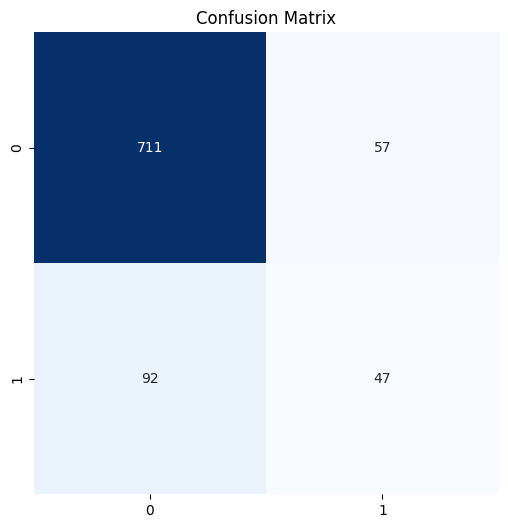

In [150]:
X = data.drop(columns=['Hazardous'])  # Features
y = data['Hazardous']  # Target variable

# Drop any datetime columns (since RandomForest can't handle datetime data)
datetime_columns = X.select_dtypes(include=['datetime64']).columns
X = X.drop(columns=datetime_columns)

# Handle non-numeric columns by encoding them
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric using label encoding
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # Store the label encoders in case you need to inverse transform later

# Now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Check for infinite values and replace them with NaN in numeric columns only
X_train[numeric_columns] = X_train[numeric_columns].replace([np.inf, -np.inf], np.nan)
X_test[numeric_columns] = X_test[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Identify columns with all NaN values
all_nan_columns = X_train.columns[X_train.isna().all()]

# Drop columns with all NaN values (since no information can be extracted)
X_train = X_train.drop(columns=all_nan_columns)
X_test = X_test.drop(columns=all_nan_columns)

# Recheck numeric columns to ensure all necessary columns are handled
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Handle NaN values by filling with the median using SimpleImputer for remaining columns
imputer = SimpleImputer(strategy='median')

# Fit and transform X_train
X_train_imputed = imputer.fit_transform(X_train[numeric_columns])
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numeric_columns, index=X_train.index)

# Transform X_test
X_test_imputed = imputer.transform(X_test[numeric_columns])
X_test_imputed = pd.DataFrame(X_test_imputed, columns=numeric_columns, index=X_test.index)

# Check for NaN values again to confirm no missing values remain
print(f"NaN values in X_train after imputation: {pd.isnull(X_train_imputed).sum().sum()}")

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Check the new class distribution after SMOTE
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

# Build a RandomForestClassifier model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix=confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()



#### 4.2 Implementing K-Fold Cross Validation
This block implements K-Fold Cross Validation to train the dataset.


All values in the dataset are finite.
K=2, Mean Accuracy: 0.841420379355977
K=3, Mean Accuracy: 0.8429634765394748
K=4, Mean Accuracy: 0.8462685881779733
K=5, Mean Accuracy: 0.8462697537669973
K=6, Mean Accuracy: 0.8467115175724448
K=7, Mean Accuracy: 0.8489167205035314
K=8, Mean Accuracy: 0.8471532802363191
K=9, Mean Accuracy: 0.8491349083628739
K=10, Mean Accuracy: 0.8509000204218573


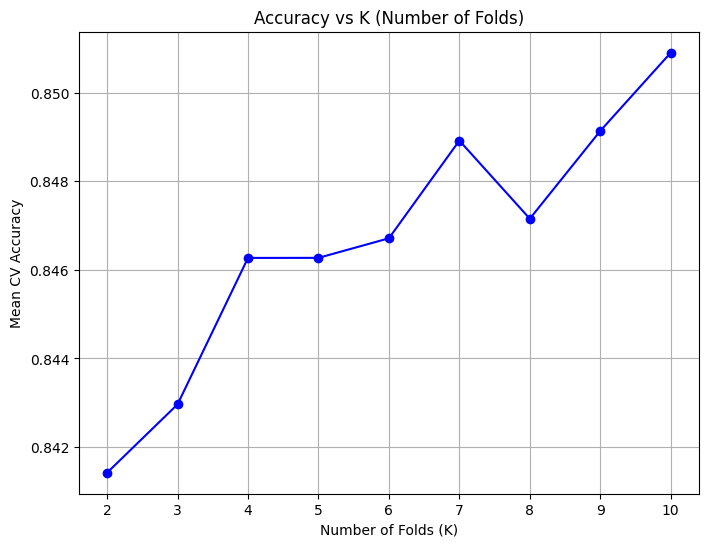

In [151]:
# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Fill remaining NaN values with the median of each feature
X = X.fillna(X.median())

# Ensure all values are finite
if not np.isfinite(X).all().all():
    print("There are non-finite values remaining in the dataset.")
else:
    print("All values in the dataset are finite.")

# Initialize model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Prepare lists to store results for plotting
k_values = list(range(2, 11))
mean_cv_scores = []

# Perform K-Fold Cross Validation for K values from 2 to 10
for k in k_values:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    
    # Store the mean CV score for this K
    mean_cv_scores.append(cv_scores.mean())
    print(f"K={k}, Mean Accuracy: {cv_scores.mean()}")

# Plot the results: Accuracy vs K
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_cv_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs K (Number of Folds)')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()



#### 4.3 Hyperparameter Optimization
This block optimizes the hyperparameters used in the classifier using GridSearchCV.


In [152]:
# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Fill remaining NaN values with the median of each feature
X = X.fillna(X.median())

# Ensure all values are finite
if not np.isfinite(X).all().all():
    print("There are non-finite values remaining in the dataset.")
else:
    print("All values in the dataset are finite.")

# Define the corrected parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],        # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, None],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],                  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                    # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],                 # Corrected max_features options
    'bootstrap': [True, False],                       # Whether bootstrap samples are used when building trees
    'class_weight': ['balanced', 'balanced_subsample'] # Class weights to handle imbalance
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=50,  # Number of different combinations to try
    scoring='accuracy', 
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # 5-fold cross-validation
    verbose=2, 
    random_state=42, 
    n_jobs=-1,  # Use all available cores
    error_score='raise'  # Raise errors if they occur during fitting
)

# Fit the model to perform the random search
try:
    random_search.fit(X_train_resampled, y_train_resampled)
except Exception as e:
    print(f"Error during fitting: {e}")

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best CV Score:", best_score)

# Train the model with the best hyperparameters on the full dataset
best_rf_model = random_search.best_estimator_

# Perform final cross-validation with the best model
final_cv_scores = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=5)
print(f"Final CV Accuracy: {final_cv_scores.mean()}")


# Train the best model on the full dataset and evaluate
best_rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_rf_model.predict(X_test_imputed)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


All values in the dataset are finite.
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total ti


#### 4.4 ROC Curve and Confusion Matrix
This block plots the ROC curve and confusion matrix to quantify the classifier's performance.


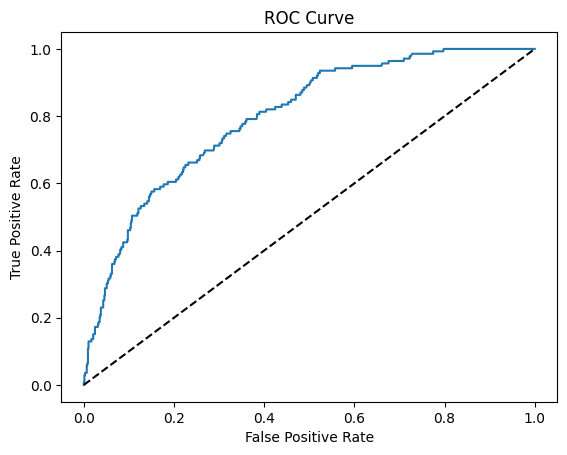

Confusion Matrix:
[[720  48]
 [ 92  47]]


In [153]:
# Use the test set for making predictions (not the full dataset)
y_pred = best_rf_model.predict(X_test_imputed)

# ROC Curve
y_proba = best_rf_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


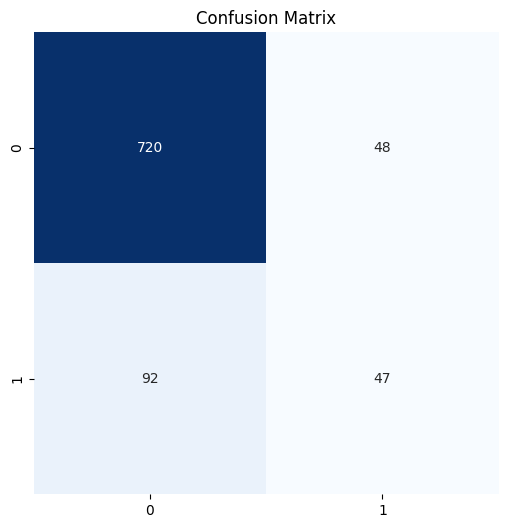

In [154]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()


#### 4.5 SHAP Values and Permutation Importance
This block uses SHAP values or permutation importance to list the most and least useful features for the classification task.


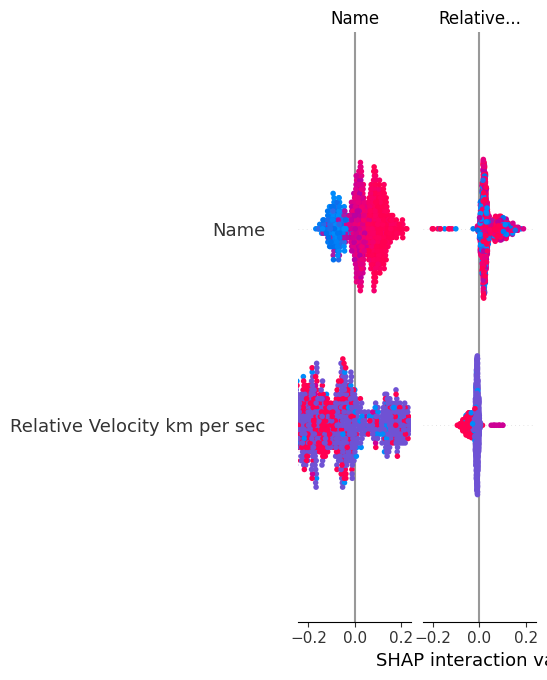

In [155]:
# Create SHAP explainer for the RandomForest model
explainer = shap.TreeExplainer(best_rf_model)

# Get SHAP values (for binary classification, this returns a list with two arrays)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for the positive class (class 1)
# Using shap_values[1] for class 1 in binary classification
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


Most important features according to Permutation Importance:
                         Feature  Importance
0                           Name    0.013010
12                Perihelion Arg    0.010915
43     relative_velocity_numeric    0.007938
41  perihelion_to_aphelion_ratio    0.005843
8    Jupiter Tisserand Invariant    0.005513

Least important features according to Permutation Importance:
                      Feature  Importance
23        miss_distance_ratio   -0.002536
44  orbit_uncertainty_numeric   -0.002536
32     semi_major_axis_meters   -0.002756
21         Orbit Uncertainity   -0.005402
17              approach_year   -0.006174


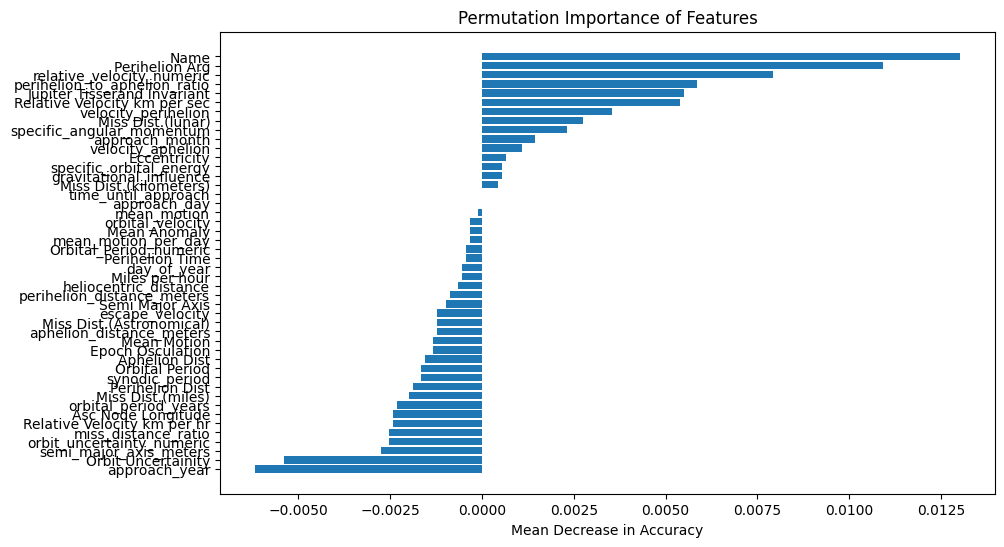

In [156]:

# Perform permutation importance
result = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame to display the feature importance rankings
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display most and least useful features
print("Most important features according to Permutation Importance:")
print(perm_importance_df.head())

print("\nLeast important features according to Permutation Importance:")
print(perm_importance_df.tail())

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Importance of Features')
plt.gca().invert_yaxis()
plt.show()

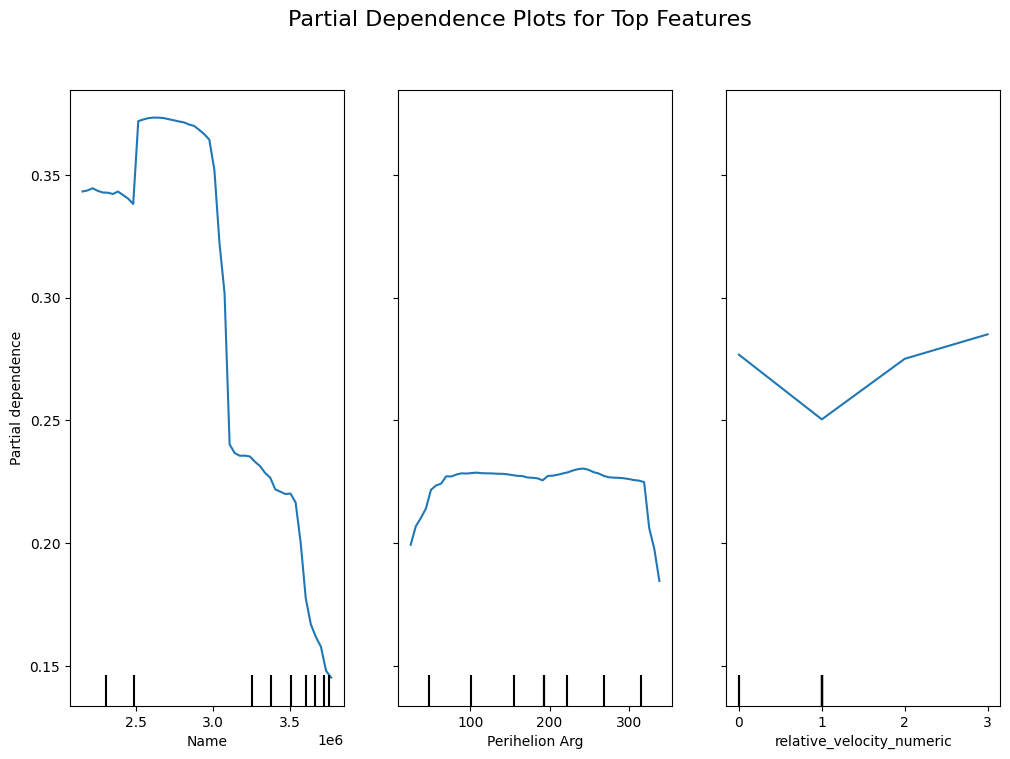

In [157]:

# Plot Partial Dependence for the top 3 most important features from permutation importance
top_features = perm_importance_df['Feature'].head(3).values

# Plot PDP for the top features
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(best_rf_model, X_test, features=top_features, grid_resolution=50, ax=ax)
plt.suptitle('Partial Dependence Plots for Top Features', fontsize=16)
plt.show()



#### 5.1.1 Inbuilt Library for Anomaly Detection
This block performs anomaly detection using an inbuilt method such as IsolationForest.


In [158]:

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies (1 for normal, -1 for anomalies)
anomalies_iso_forest = iso_forest.fit_predict(X)

# Add the results to the dataset (1 = normal, -1 = anomaly)
data['Anomaly_Library'] = anomalies_iso_forest

# Print the number of anomalies detected
num_anomalies_library = (anomalies_iso_forest == -1).sum()
print(f"Number of anomalies detected by the inbuilt library (Isolation Forest): {num_anomalies_library}")


Number of anomalies detected by the inbuilt library (Isolation Forest): 227



#### 5.1.2 Custom Anomaly Detection Algorithm
This block implements a custom anomaly detection algorithm based on statistical thresholds (e.g., z-scores).


In [159]:
# Z-Score-based anomaly detection function
def z_score_anomaly_detection(data, threshold=3):
    # Calculate the Z-scores for each feature
    z_scores = np.abs((data - data.mean()) / data.std())
    
    # Flag anomalies where the Z-score is above the threshold for any feature
    anomalies = (z_scores > threshold).any(axis=1)
    
    # Return 1 for normal and -1 for anomalies
    return np.where(anomalies, -1, 1)

# Apply the Z-score anomaly detection method
anomalies_z_score = z_score_anomaly_detection(X)

# Add the results to the dataset (1 = normal, -1 = anomaly)
data['Anomaly_Custom'] = anomalies_z_score

# Print the number of anomalies detected
num_anomalies_custom = (anomalies_z_score == -1).sum()
print(f"Number of anomalies detected by the custom algorithm (Z-Score): {num_anomalies_custom}")


Number of anomalies detected by the custom algorithm (Z-Score): 686


#### 5.2 Store Results and Compare
This block stores results and compares.

In [160]:
# Add a column for anomalies detected by both algorithms
data['Both_Anomalies'] = (data['Anomaly_Library'] == -1) & (data['Anomaly_Custom'] == -1)

# Print the number of examples flagged as anomalies by both algorithms
num_both_anomalies = data['Both_Anomalies'].sum()
print(f"Number of examples flagged as anomalies by both algorithms: {num_both_anomalies}")


Number of examples flagged as anomalies by both algorithms: 189



#### 5.3 Comparing Results and Confusion Matrix
This block compares the results of both anomaly detection methods and presents a confusion matrix.


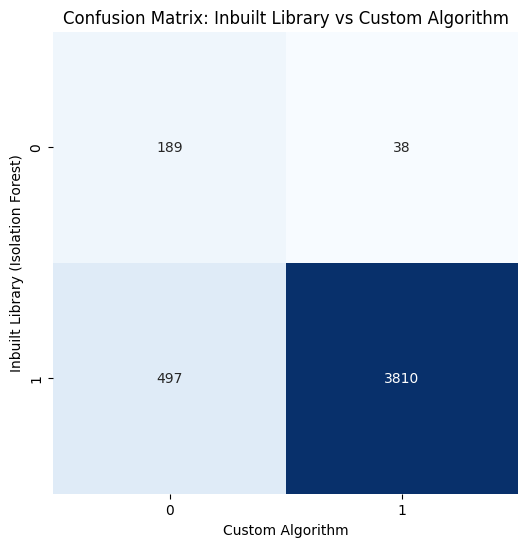

In [161]:

# Confusion Matrix to compare results
conf_matrix = confusion_matrix(data['Anomaly_Library'], data['Anomaly_Custom'])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Custom Algorithm')
plt.ylabel('Inbuilt Library (Isolation Forest)')
plt.title('Confusion Matrix: Inbuilt Library vs Custom Algorithm')
plt.show()
